In [10]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": -27.5967,
	"longitude": -48.5492,
	"hourly": ["windspeed_1000hPa", "windspeed_975hPa", "windspeed_950hPa", "windspeed_925hPa", "windspeed_900hPa", "windspeed_850hPa", "winddirection_1000hPa", "winddirection_975hPa", "winddirection_950hPa", "winddirection_925hPa", "winddirection_900hPa", "winddirection_850hPa", "geopotential_height_1000hPa", "geopotential_height_975hPa", "geopotential_height_950hPa", "geopotential_height_925hPa", "geopotential_height_900hPa", "geopotential_height_850hPa"],
	"forecast_days": 16,
	"models": "ecmwf_ifs04"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_windspeed_1000hPa = hourly.Variables(0).ValuesAsNumpy()
hourly_windspeed_975hPa = hourly.Variables(1).ValuesAsNumpy()
hourly_windspeed_950hPa = hourly.Variables(2).ValuesAsNumpy()
hourly_windspeed_925hPa = hourly.Variables(3).ValuesAsNumpy()
hourly_windspeed_900hPa = hourly.Variables(4).ValuesAsNumpy()
hourly_windspeed_850hPa = hourly.Variables(5).ValuesAsNumpy()
hourly_winddirection_1000hPa = hourly.Variables(6).ValuesAsNumpy()
hourly_winddirection_975hPa = hourly.Variables(7).ValuesAsNumpy()
hourly_winddirection_950hPa = hourly.Variables(8).ValuesAsNumpy()






hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["windspeed_1000hPa"] = hourly_windspeed_1000hPa
hourly_data["windspeed_975hPa"] = hourly_windspeed_975hPa
hourly_data["windspeed_950hPa"] = hourly_windspeed_950hPa
hourly_data["windspeed_925hPa"] = hourly_windspeed_925hPa
hourly_data["windspeed_900hPa"] = hourly_windspeed_900hPa
hourly_data["windspeed_850hPa"] = hourly_windspeed_850hPa
hourly_data["winddirection_1000hPa"] = hourly_winddirection_1000hPa
hourly_data["winddirection_975hPa"] = hourly_winddirection_975hPa
hourly_data["winddirection_950hPa"] = hourly_winddirection_950hPa


hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)


Coordinates -27.200000762939453°N -48.80000305175781°E
Elevation 16.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                         date  windspeed_1000hPa  windspeed_975hPa  \
0   2024-03-18 00:00:00+00:00           7.200000         18.847641   
1   2024-03-18 01:00:00+00:00           5.692099         20.377399   
2   2024-03-18 02:00:00+00:00           3.877318         20.674156   
3   2024-03-18 03:00:00+00:00           2.902413         20.240198   
4   2024-03-18 04:00:00+00:00           3.240000         18.626305   
..                        ...                ...               ...   
379 2024-04-02 19:00:00+00:00                NaN               NaN   
380 2024-04-02 20:00:00+00:00                NaN               NaN   
381 2024-04-02 21:00:00+00:00                NaN               NaN   
382 2024-04-02 22:00:00+00:00                NaN               NaN   
383 2024-04-02 23:00:00+00:00                NaN               NaN   

     windspeed_950hPa  windspee

In [11]:
hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

# Define the path and filename
filename = "C:\\Users\\viidi\\Downloads\\arquivos nc\\wind-dir-speed_ecmwf_forecast_18-05-2024_28-03-2024.csv"

# Save the DataFrame to a CSV file with a semicolon as the separator
hourly_dataframe.to_csv(filename, sep=';', index=False)

                         date  windspeed_1000hPa  windspeed_975hPa  \
0   2024-03-18 00:00:00+00:00           7.200000         18.847641   
1   2024-03-18 01:00:00+00:00           5.692099         20.377399   
2   2024-03-18 02:00:00+00:00           3.877318         20.674156   
3   2024-03-18 03:00:00+00:00           2.902413         20.240198   
4   2024-03-18 04:00:00+00:00           3.240000         18.626305   
..                        ...                ...               ...   
379 2024-04-02 19:00:00+00:00                NaN               NaN   
380 2024-04-02 20:00:00+00:00                NaN               NaN   
381 2024-04-02 21:00:00+00:00                NaN               NaN   
382 2024-04-02 22:00:00+00:00                NaN               NaN   
383 2024-04-02 23:00:00+00:00                NaN               NaN   

     windspeed_950hPa  windspeed_925hPa  windspeed_900hPa  windspeed_850hPa  \
0            8.404285        143.130020        151.476974        223.264328   
1

In [26]:
# Load the data
data = pd.read_csv(filename)

# Print the first few records of the DataFrame
print(data.head())

  date;windspeed_1000hPa;windspeed_975hPa;windspeed_950hPa;windspeed_925hPa;windspeed_900hPa;windspeed_850hPa;winddirection_1000hPa;winddirection_975hPa;winddirection_950hPa
0  2024-03-18 00:00:00+00:00;7.2;18.847641;8.4042...                                                                                                                         
1  2024-03-18 01:00:00+00:00;5.692099;20.3774;4.1...                                                                                                                         
2  2024-03-18 02:00:00+00:00;3.8773184;20.674156;...                                                                                                                         
3  2024-03-18 03:00:00+00:00;2.9024127;20.240198;...                                                                                                                         
4  2024-03-18 04:00:00+00:00;3.2399998;18.626305;...                                                                              

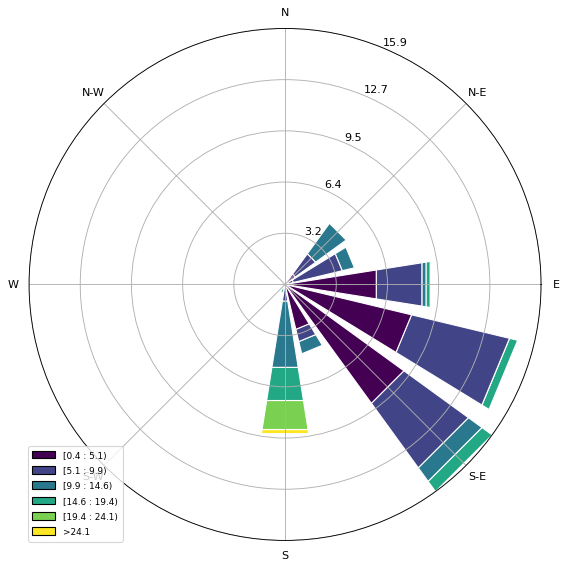

In [19]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load the wind speed and direction data
wind_speed = data['windspeed_1000hPa']
wind_direction = data['winddirection_1000hPa']

# Create a new windrose axes
ax = WindroseAxes.from_ax()

# Create the windrose diagram
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')

# Set the legend
ax.set_legend()

# Show the plot
plt.show()

C:\Users\viidi\AppData\Local\Temp\ipykernel_12588\2531498144.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data['date'] = data['date'].str.replace(r'\+00:00', '')


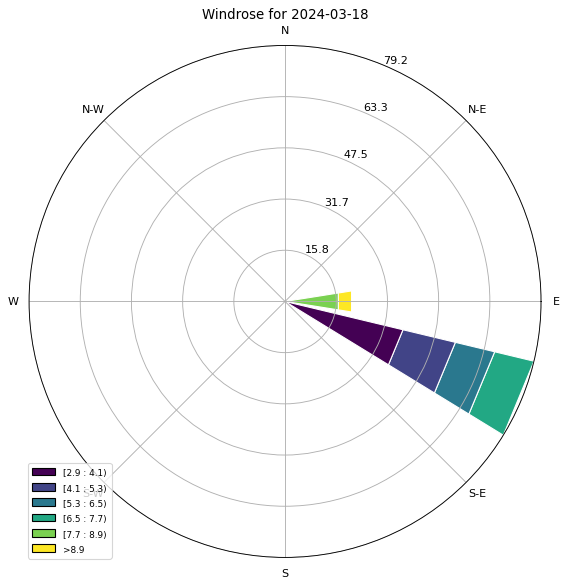

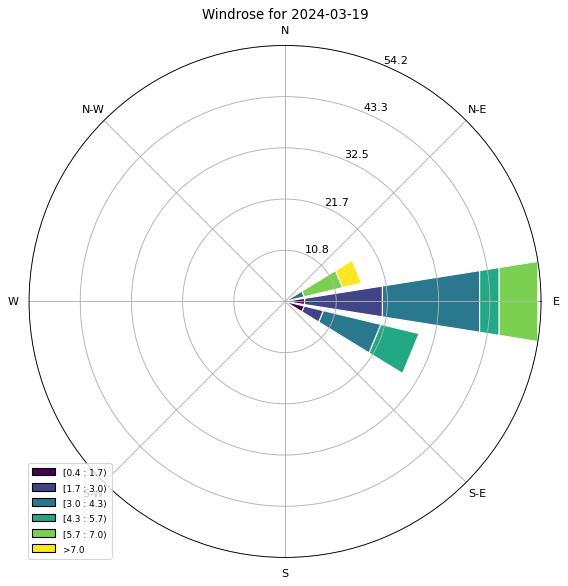

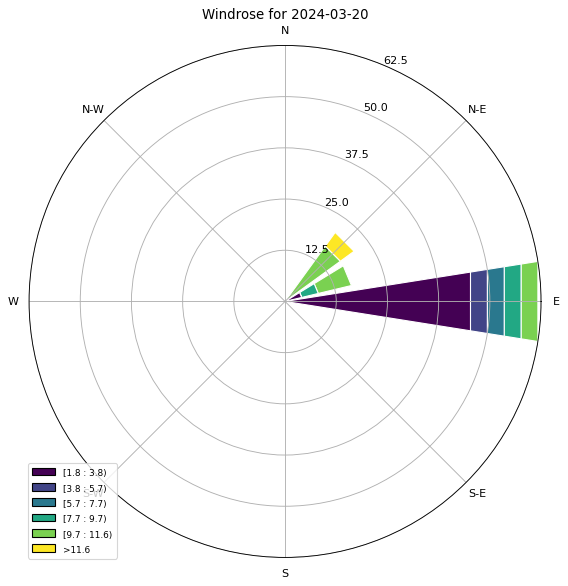

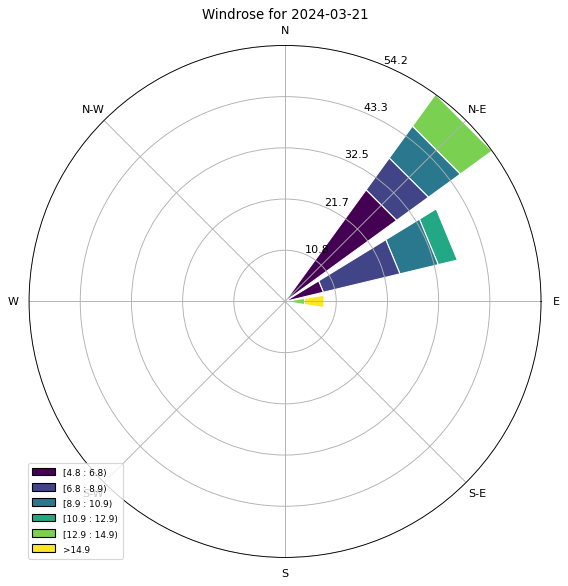

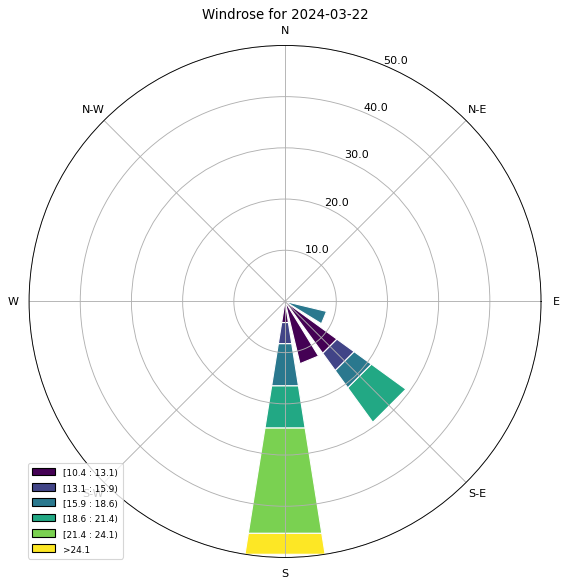

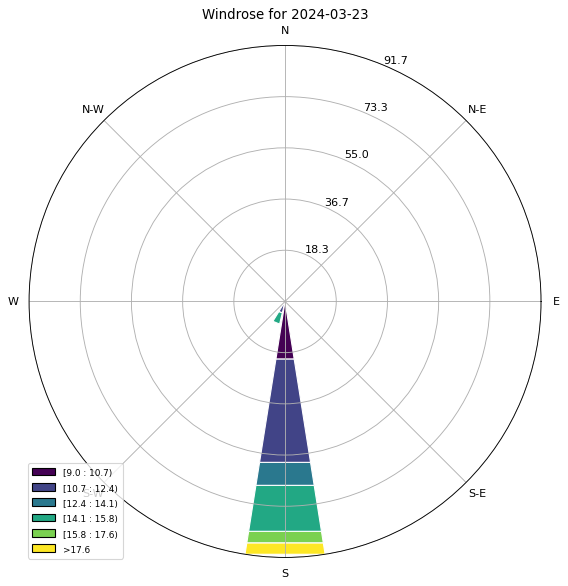

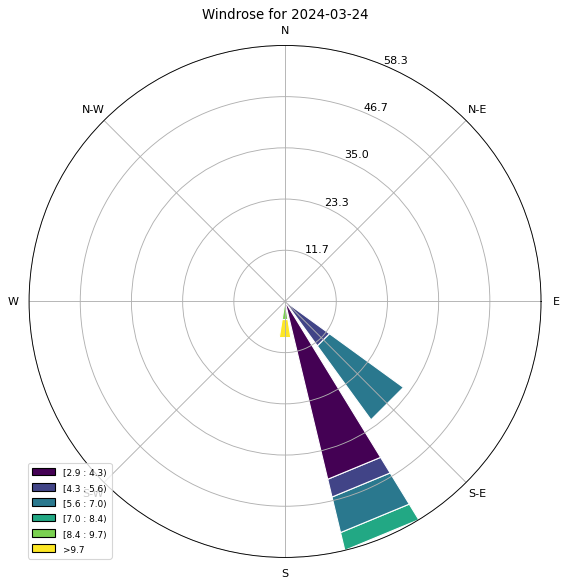

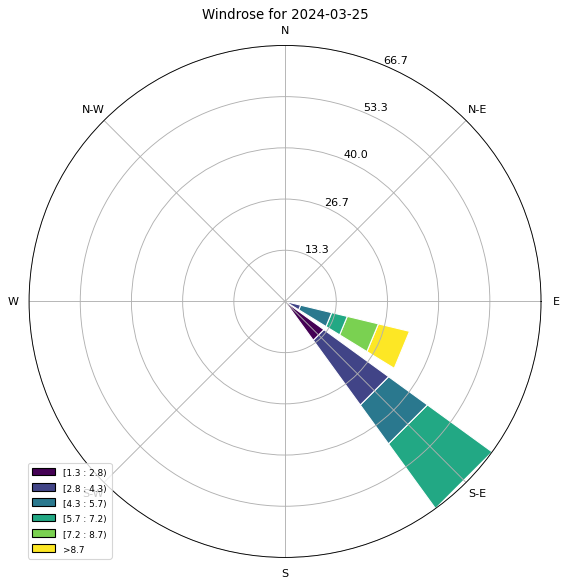

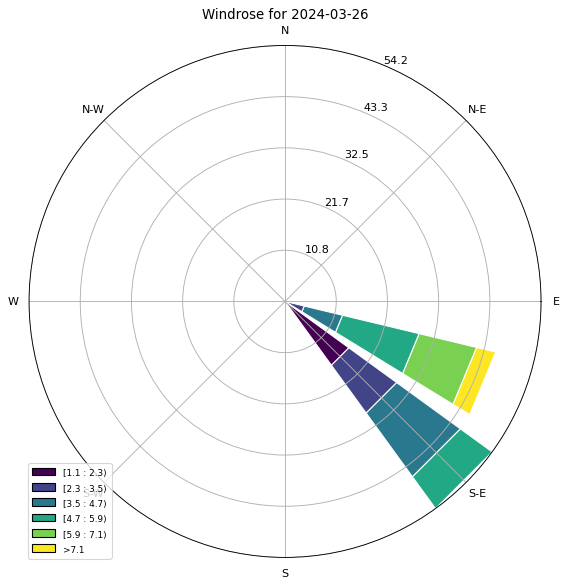

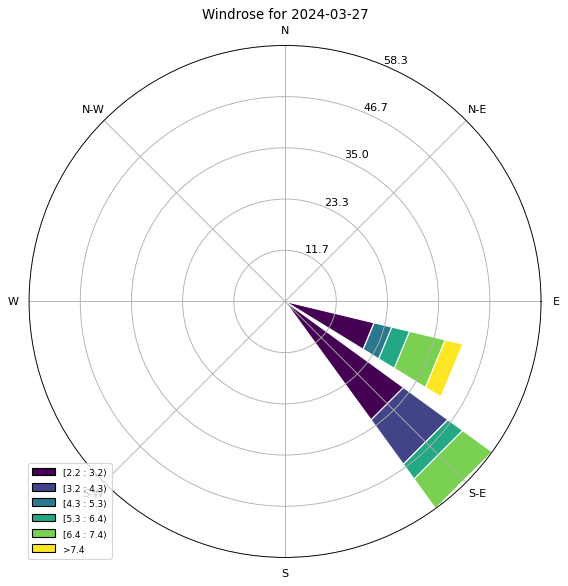

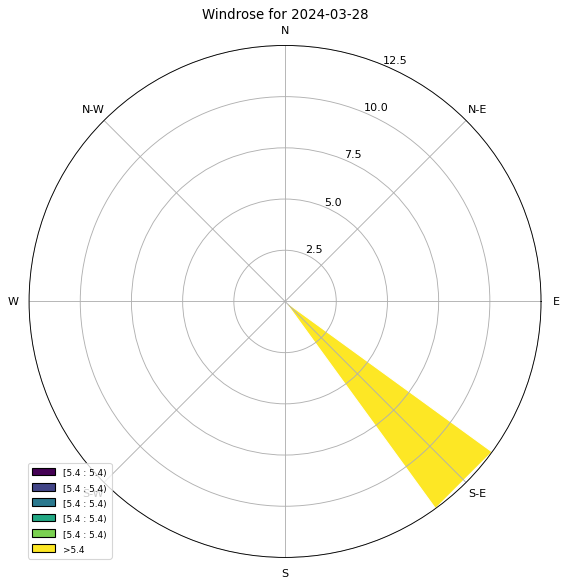

c:\Users\viidi\miniconda3\Lib\site-packages\matplotlib\projections\polar.py:782: RuntimeWarning: divide by zero encountered in scalar divide
  rscale = 0.5 / points[1, 1]
c:\Users\viidi\miniconda3\Lib\site-packages\matplotlib\projections\polar.py:783: RuntimeWarning: invalid value encountered in multiply
  points[:, 1] *= rscale
c:\Users\viidi\miniconda3\Lib\site-packages\matplotlib\projections\polar.py:794: RuntimeWarning: invalid value encountered in scalar subtract
  deltah = max(w - h, 0) / 2
c:\Users\viidi\miniconda3\Lib\site-packages\matplotlib\projections\polar.py:795: RuntimeWarning: invalid value encountered in scalar subtract
  deltaw = max(h - w, 0) / 2
c:\Users\viidi\miniconda3\Lib\site-packages\matplotlib\projections\polar.py:179: RuntimeWarning: divide by zero encountered in scalar divide
  .scale(0.5 / yscale) \
c:\Users\viidi\miniconda3\Lib\site-packages\matplotlib\transforms.py:2061: RuntimeWarning: invalid value encountered in scalar multiply
  self._mtx[0, 1] *= sx
c

ValueError: need at least one array to concatenate

<Figure size 640x640 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x640 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x640 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x640 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x640 with 1 Axes>

In [27]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import pandas as pd

# Load the data
data = pd.read_csv(filename, sep=';')

# Remove leading and trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Remove the timezone information from the 'date' column
data['date'] = data['date'].str.replace(r'\+00:00', '')

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Group the data by date
grouped = data.groupby(data['date'].dt.date)

# For each group (i.e., each date), create a windrose plot
for date, group in grouped:
    wind_speed = group['windspeed_1000hPa']
    wind_direction = group['winddirection_1000hPa']

    ax = WindroseAxes.from_ax()
    ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()

    plt.title(f"Windrose for {date}")
    plt.show()